# Deep Learning Project

In [25]:
from src import train,evaluate,loss,preprocessed,model
import importlib
import pandas as pd
import torch.nn as nn
import torch


In [4]:
importlib.reload(train)
importlib.reload(evaluate)
importlib.reload(loss)
importlib.reload(preprocessed)
importlib.reload(model)

<module 'src.model' from 'c:\\Users\\coren\\Projet Deep Learning\\CS230\\src\\model.py'>

## I- Download and process the data

In [51]:
years = ['2011','2012','2013','2014','2015']
for year in years:
    preprocessed.process_raw_data(year,sampling_method='NearMiss')
    print(f"the dataset for {year} is done.")

the dataset for 2011 is done.
the dataset for 2012 is done.
the dataset for 2013 is done.
the dataset for 2014 is done.
the dataset for 2015 is done.


In [54]:
df,_ = preprocessed.get_data('2012','NearMiss','train')

for col in df.columns:
    print(f"Colonne {col}: {sorted(df[col].unique())}")

Colonne Education_level: [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
Colonne Has_smoked_100_cigs: [0.0, 1.0]
Colonne Sex: [0.0, 1.0]
Colonne Healthcare_coverage: [0.0, 1.0]
Colonne MEDCOST: [0.0, 1.0]
Colonne PHYSHLTH: [0.0, 0.0333333333333333, 0.0666666666666666, 0.1, 0.1333333333333333, 0.1666666666666666, 0.2, 0.2333333333333333, 0.2666666666666666, 0.3, 0.3333333333333333, 0.3666666666666666, 0.4, 0.4333333333333333, 0.4666666666666667, 0.5, 0.5333333333333333, 0.5666666666666667, 0.6, 0.6333333333333333, 0.6666666666666666, 0.7, 0.7333333333333333, 0.7666666666666667, 0.8, 0.8333333333333334, 0.8666666666666667, 0.9, 0.9333333333333332, 0.9666666666666668, 1.0]
Colonne GENHLTH: [0.0, 0.25, 0.5, 0.75, 1.0]
Colonne Income_bracket: [0.0, 0.1428571428571428, 0.2857142857142857, 0.4285714285714285, 0.5714285714285714, 0.7142857142857143, 0.8571428571428571, 1.0]
Colonne MENTHLTH: [0.0, 0.0333333333333333, 0.0666666666666666, 0.1, 0.1333333333333333, 0.1666666666666666, 0.2, 0.2333333333333333, 0.26

## II- Testing Model

### 1- Logistic Regression

In [55]:
hyperparameters = {'penality' : None,
                   'solver' : 'lbfgs',
                   'epoch' : 1000}

c:\Users\coren\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy train: 0.7591
Accuracy test: 0.7407
F1 Score train: 0.7656
F1 Score test: 0.4470


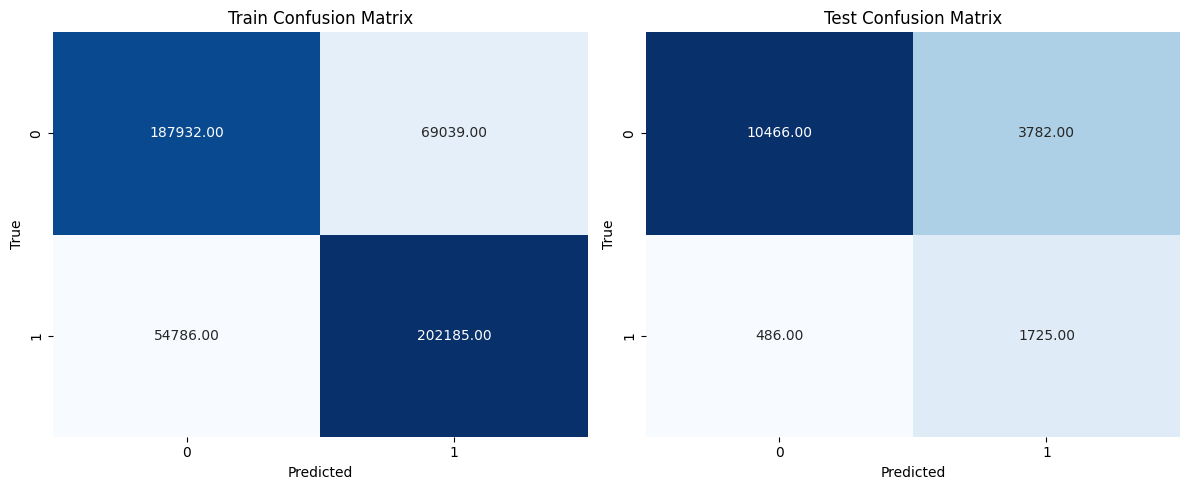

c:\Users\coren\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy train: 0.7454
Accuracy test: 0.7280
F1 Score train: 0.7497
F1 Score test: 0.4181


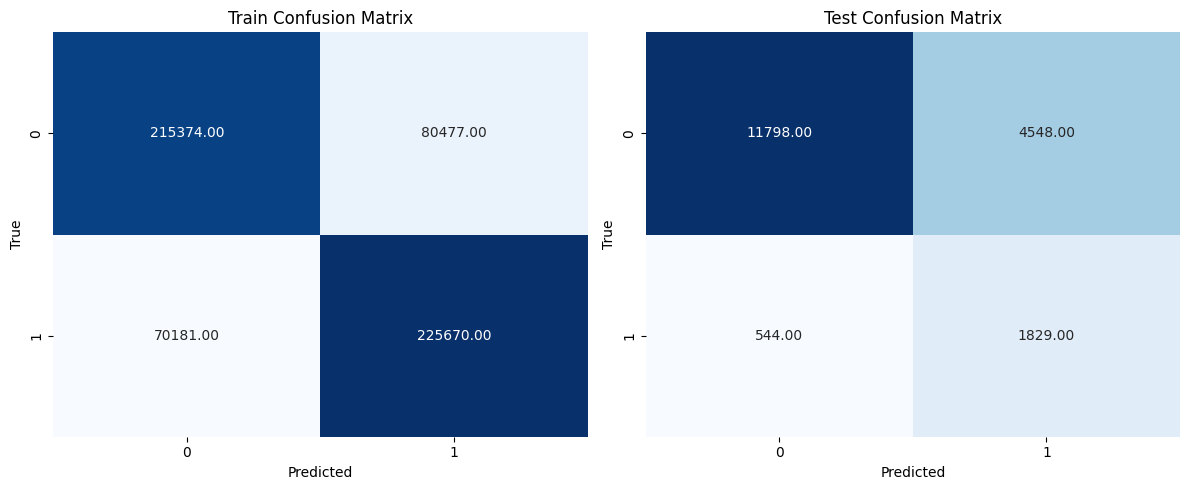

c:\Users\coren\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy train: 0.7575
Accuracy test: 0.7373
F1 Score train: 0.7645
F1 Score test: 0.4506


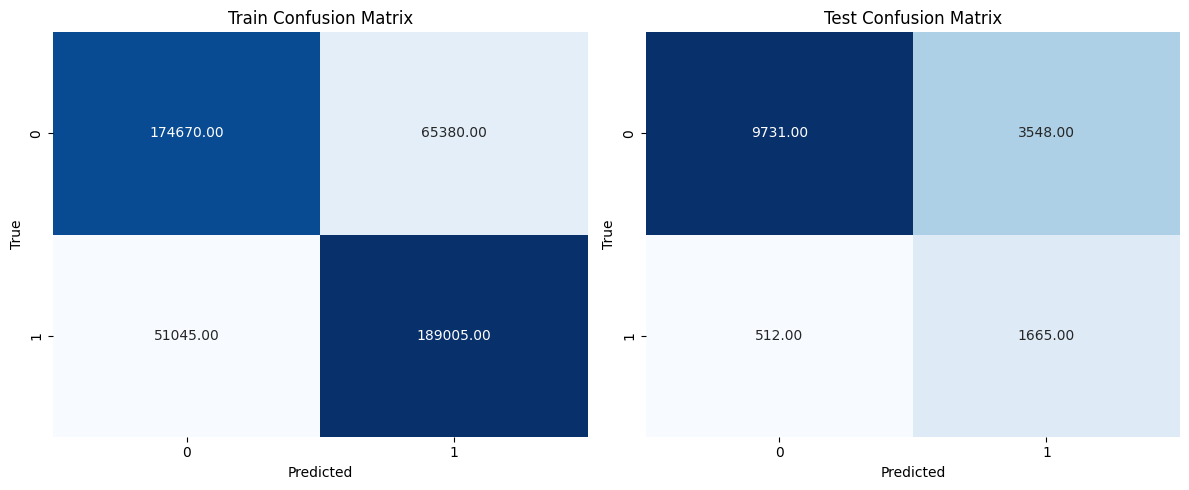

c:\Users\coren\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy train: 0.7430
Accuracy test: 0.7303
F1 Score train: 0.7478
F1 Score test: 0.4089


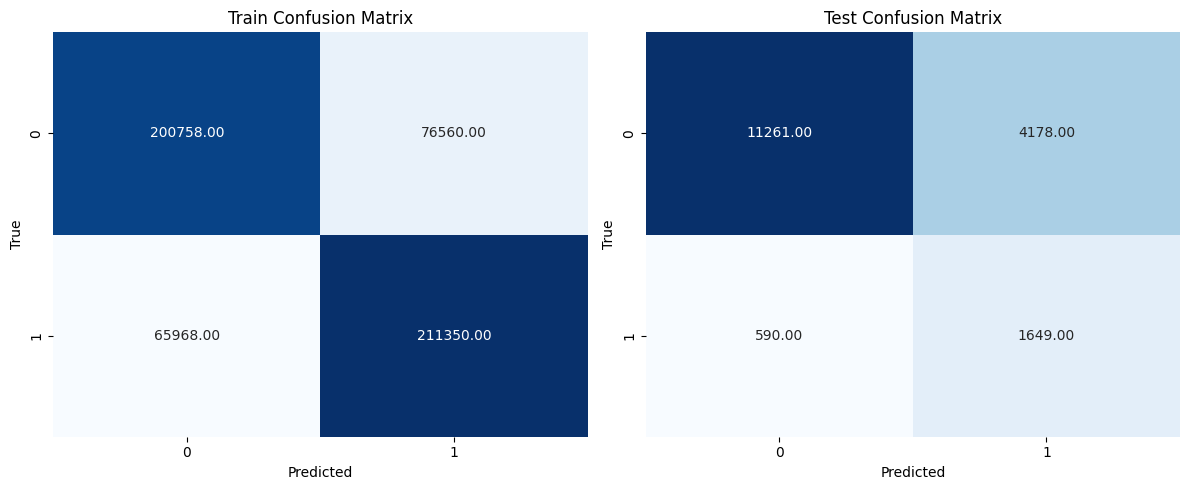

c:\Users\coren\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy train: 0.7525
Accuracy test: 0.7232
F1 Score train: 0.7593
F1 Score test: 0.4439


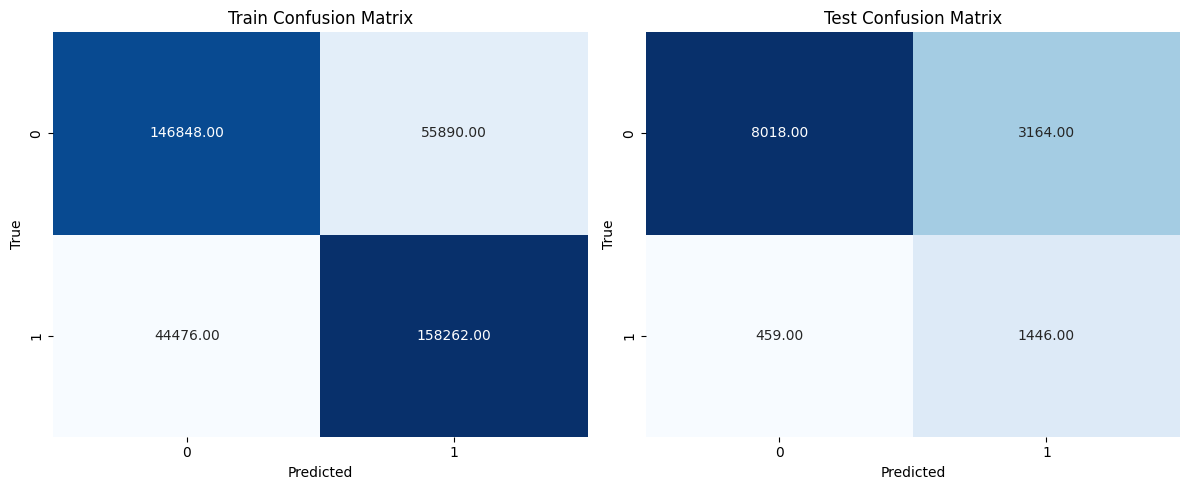

In [56]:
dict_model_logistic = {}
for year in years :
    X_train,Y_train = preprocessed.get_data(year,'Smote',data = 'train')
    X_test,Y_test = preprocessed.get_data(year,'Smote',data = 'test')
    model_logistic,X_train,X_test = train.train_logistic(X_train,Y_train,X_test,Y_test,hyperparameters)
    evaluate.evaluate_model(model_logistic,X_train,Y_train,X_test,Y_test)
    dict_model_logistic[year] = model_logistic
    

### 2- Neural Network

In [60]:
hyperparameters =  {'batch_size' : 64,
                    'optimizer' : 'adam',
                    'learning_rate' : 0.001,
                    'epochs' : 2,
                    'loss' : 'binary_crossentropy'}

hidden_layers = [100,100,100,20]

Epoch 1/2
8031/8031 ━━━━━━━━━━━━━━━━━━━━ 9s 979us/step - accuracy: 0.7250 - loss: 1.7526 - val_accuracy: 0.7488 - val_loss: 0.5573
Epoch 2/2
8031/8031 ━━━━━━━━━━━━━━━━━━━━ 8s 983us/step - accuracy: 0.7518 - loss: 0.5712 - val_accuracy: 0.7562 - val_loss: 0.5369
16061/16061 ━━━━━━━━━━━━━━━━━━━━ 10s 592us/step
515/515 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step
Accuracy train: 0.7541
Accuracy test: 0.7562
F1 Score train: 0.7531
F1 Score test: 0.4513


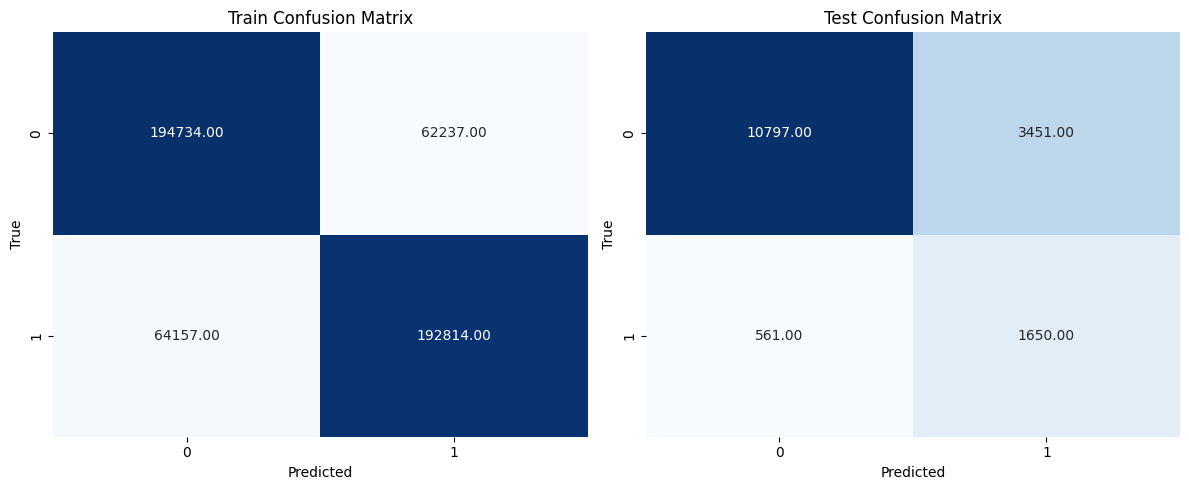

Epoch 1/2
9246/9246 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - accuracy: 0.7178 - loss: 1.6102 - val_accuracy: 0.7515 - val_loss: 0.5335
Epoch 2/2
9246/9246 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.7431 - loss: 0.5713 - val_accuracy: 0.6903 - val_loss: 0.6112
18491/18491 ━━━━━━━━━━━━━━━━━━━━ 12s 643us/step
585/585 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step
Accuracy train: 0.7474
Accuracy test: 0.6903
F1 Score train: 0.7641
F1 Score test: 0.4026


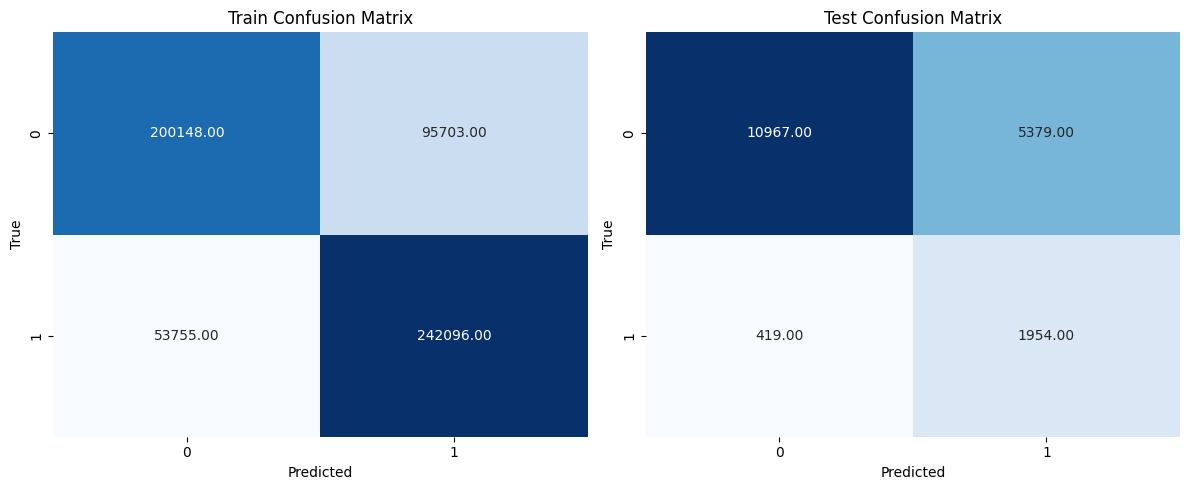

Epoch 1/2
7502/7502 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.7220 - loss: 1.5698 - val_accuracy: 0.6563 - val_loss: 0.6901
Epoch 2/2
7502/7502 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.7509 - loss: 0.5704 - val_accuracy: 0.6738 - val_loss: 0.6457
15004/15004 ━━━━━━━━━━━━━━━━━━━━ 9s 609us/step
483/483 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step
Accuracy train: 0.7510
Accuracy test: 0.6738
F1 Score train: 0.7755
F1 Score test: 0.4232


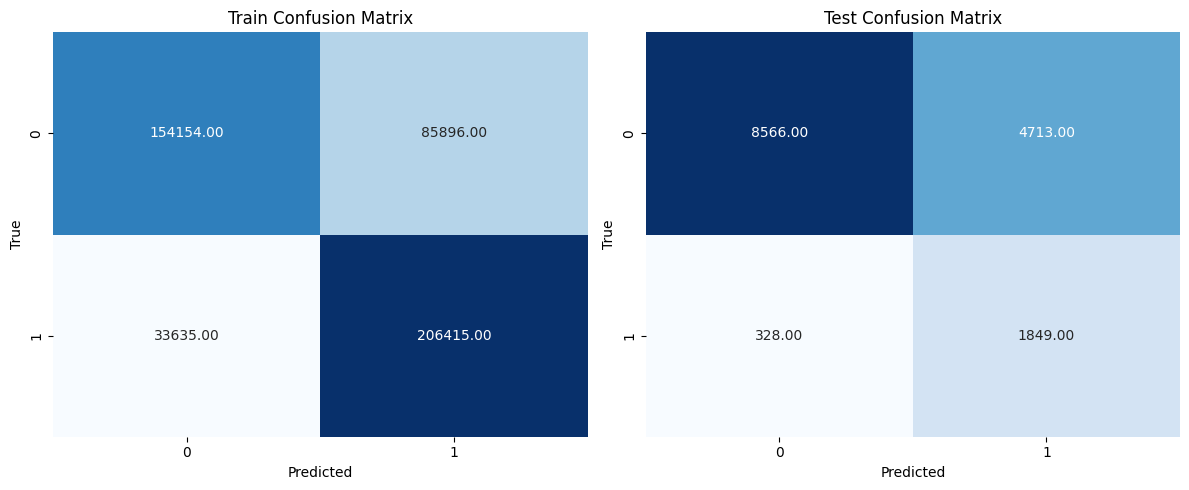

Epoch 1/2
8667/8667 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.7129 - loss: 1.8263 - val_accuracy: 0.7559 - val_loss: 0.5362
Epoch 2/2
8667/8667 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.7402 - loss: 0.5736 - val_accuracy: 0.6793 - val_loss: 0.6261
17333/17333 ━━━━━━━━━━━━━━━━━━━━ 12s 689us/step
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Accuracy train: 0.7436
Accuracy test: 0.6793
F1 Score train: 0.7639
F1 Score test: 0.3879


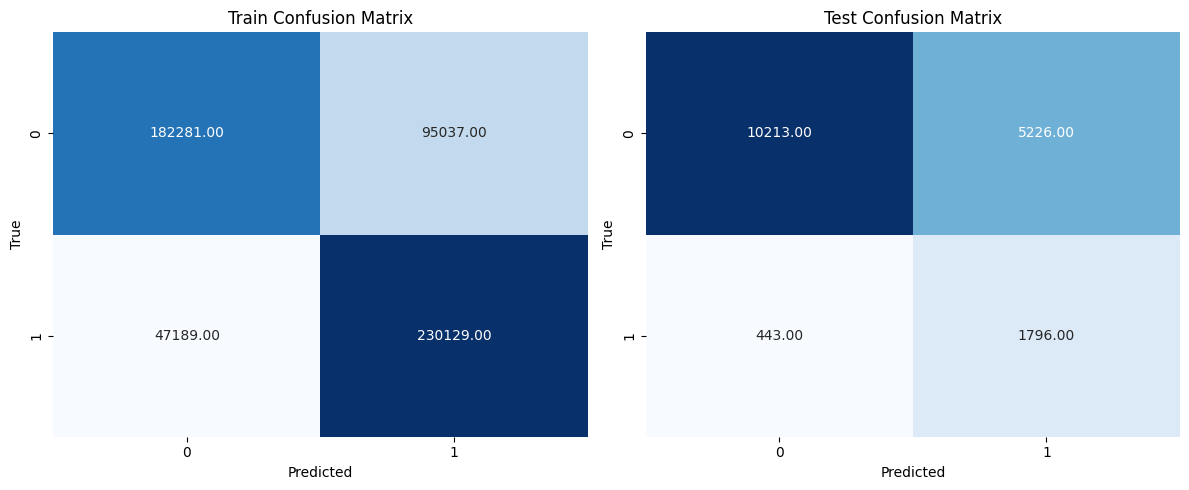

Epoch 1/2
6336/6336 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.7138 - loss: 1.9706 - val_accuracy: 0.6722 - val_loss: 0.6709
Epoch 2/2
6336/6336 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.7455 - loss: 0.5841 - val_accuracy: 0.6636 - val_loss: 0.6637
12672/12672 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step
409/409 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy train: 0.7487
Accuracy test: 0.6636
F1 Score train: 0.7737
F1 Score test: 0.4234


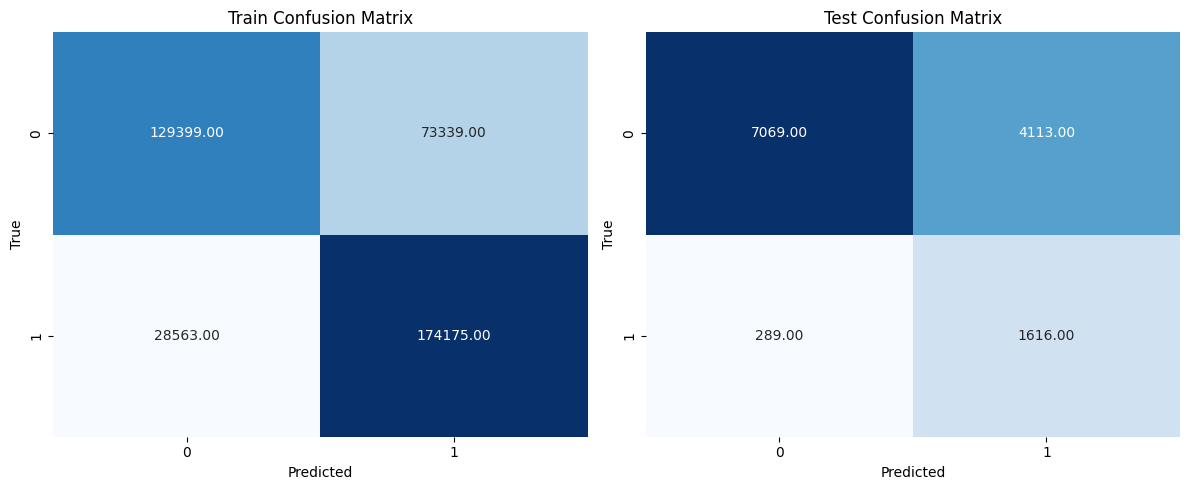

In [ ]:
dict_model = {}
for year in years :
    X_train,Y_train = preprocessed.get_data(year,'Smote',data = 'train')
    X_test,Y_test = preprocessed.get_data(year,'Smote',data = 'test')
    num_input = X_train.shape[1]
    model_year = model.create_sequential_model(num_input,hidden_layers,dropout_rates=0.0,l1_rate=0.0,l2_rate=0.01)
    train.train_model(X_train,Y_train,X_test,Y_test,model_year,hyperparameters)
    evaluate.evaluate_model(model_year,X_train,Y_train,X_test,Y_test)
    dict_model[year] = model_year

### Grid search parameters

In [4]:
hyperparameters_grid =  {'batch_size' : ('log',64,1024,5),
                    'optimizer' : 'adam',
                    'learning_rate' : ('log',0.0001,0.1,10),
                    'epochs' : 2,
                    'loss' : 'binary_crossentropy'}

hidden_layers = [100,100,20]

In [5]:

year = "2011"
X_train,Y_train = preprocessed.get_data(year,'Smote',data = 'train')
X_test,Y_test = preprocessed.get_data(year,'Smote',data = 'test')
num_input = X_train.shape[1]
model_year = model.create_sequential_model(num_input,hidden_layers,dropout_rates=0.0,l1_rate=0.0,l2_rate=0.01)
dist = train.grid_search_train(X_train,Y_train,X_test,Y_test,model_year,hyperparameters_grid)


Training with parameters: {'batch_size': 63.999999999999986, 'optimizer': 'adam', 'learning_rate': 0.0001, 'epochs': 2, 'loss': 'binary_crossentropy'}
Epoch 1/2
8158/8158 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - accuracy: 0.7137 - loss: 3.1448 - val_accuracy: 0.7530 - val_loss: 1.1909
Epoch 2/2
8158/8158 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.7502 - loss: 1.1016 - val_accuracy: 0.7240 - val_loss: 0.8890
Training with parameters: {'batch_size': 63.999999999999986, 'optimizer': 'adam', 'learning_rate': 0.00021544346900318845, 'epochs': 2, 'loss': 'binary_crossentropy'}
Epoch 1/2
8158/8158 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - accuracy: 0.7508 - loss: 0.8003 - val_accuracy: 0.6924 - val_loss: 0.7300
Epoch 2/2
8158/8158 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.7556 - loss: 0.6366 - val_accuracy: 0.7264 - val_loss: 0.6117
Training with parameters: {'batch_size': 63.999999999999986, 'optimizer': 'adam', 'learning_rate': 0.00046415888336127773, 'epochs': 2, 'loss': 'binary_crossentro

In [17]:

for instance in dist :
    a,b = instance['test_loss']
    if b > 0.865666 :
        print(instance['params'])


{'batch_size': 63.999999999999986, 'optimizer': 'adam', 'learning_rate': 0.1, 'epochs': 2, 'loss': 'binary_crossentropy'}
{'batch_size': 127.99999999999999, 'optimizer': 'adam', 'learning_rate': 0.0001, 'epochs': 2, 'loss': 'binary_crossentropy'}
{'batch_size': 127.99999999999999, 'optimizer': 'adam', 'learning_rate': 0.00046415888336127773, 'epochs': 2, 'loss': 'binary_crossentropy'}
{'batch_size': 127.99999999999999, 'optimizer': 'adam', 'learning_rate': 0.001, 'epochs': 2, 'loss': 'binary_crossentropy'}
{'batch_size': 127.99999999999999, 'optimizer': 'adam', 'learning_rate': 0.01, 'epochs': 2, 'loss': 'binary_crossentropy'}
{'batch_size': 127.99999999999999, 'optimizer': 'adam', 'learning_rate': 0.021544346900318822, 'epochs': 2, 'loss': 'binary_crossentropy'}
{'batch_size': 127.99999999999999, 'optimizer': 'adam', 'learning_rate': 0.046415888336127774, 'epochs': 2, 'loss': 'binary_crossentropy'}
{'batch_size': 127.99999999999999, 'optimizer': 'adam', 'learning_rate': 0.1, 'epochs':

### Grid search architecture

In [39]:
hyperparameters=  {'batch_size' : 512,
                    'optimizer' : 'adam',
                    'learning_rate' : 0.002,
                    'epochs' : 3,
                    'loss' : 'binary_crossentropy'}

hidden_layers_list = [[50,50,20]]
l1_rate_list = [0,0.001,0.002,0.004]
l2_rate_list = [0,0.005,0.01,0.05,0.1]
dropout_rate_list = [0]

Epoch 1/3
1004/1004 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7082 - loss: 0.5905 - val_accuracy: 0.7482 - val_loss: 0.4770
Epoch 2/3
1004/1004 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7576 - loss: 0.5002 - val_accuracy: 0.7131 - val_loss: 0.5380
Epoch 3/3
1004/1004 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7616 - loss: 0.4914 - val_accuracy: 0.7305 - val_loss: 0.5113
16061/16061 ━━━━━━━━━━━━━━━━━━━━ 8s 521us/step
515/515 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step
Accuracy train: 0.7675
Accuracy test: 0.7305
F1 Score train: 0.7788
F1 Score test: 0.4398


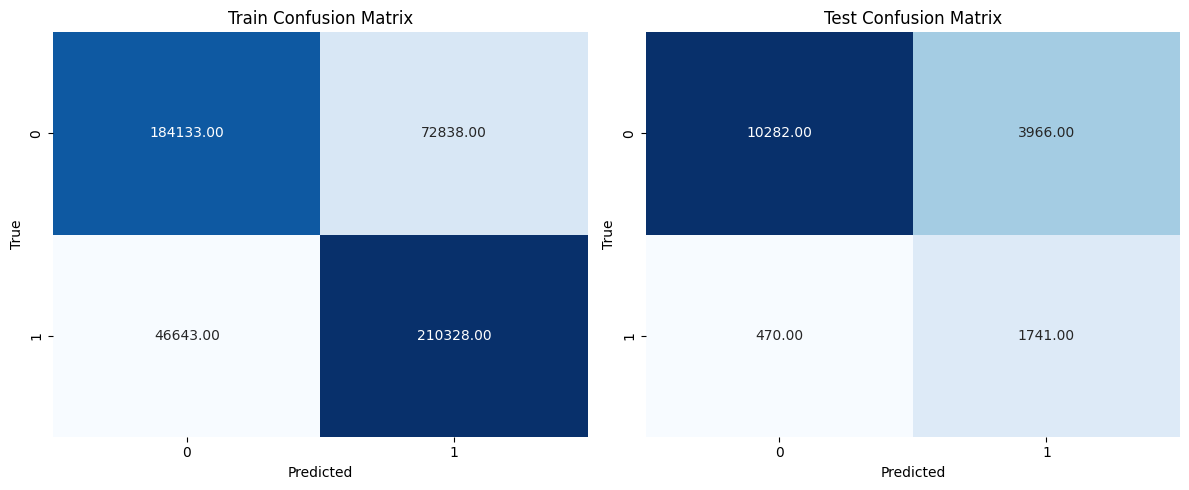

Epoch 1/3
1004/1004 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7053 - loss: 1.2027 - val_accuracy: 0.7657 - val_loss: 0.6303
Epoch 2/3
1004/1004 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7535 - loss: 0.6617 - val_accuracy: 0.7298 - val_loss: 0.6110
Epoch 3/3
1004/1004 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7571 - loss: 0.5885 - val_accuracy: 0.7136 - val_loss: 0.5932
16061/16061 ━━━━━━━━━━━━━━━━━━━━ 8s 503us/step
515/515 ━━━━━━━━━━━━━━━━━━━━ 0s 622us/step
Accuracy train: 0.7605
Accuracy test: 0.7136
F1 Score train: 0.7750
F1 Score test: 0.4342


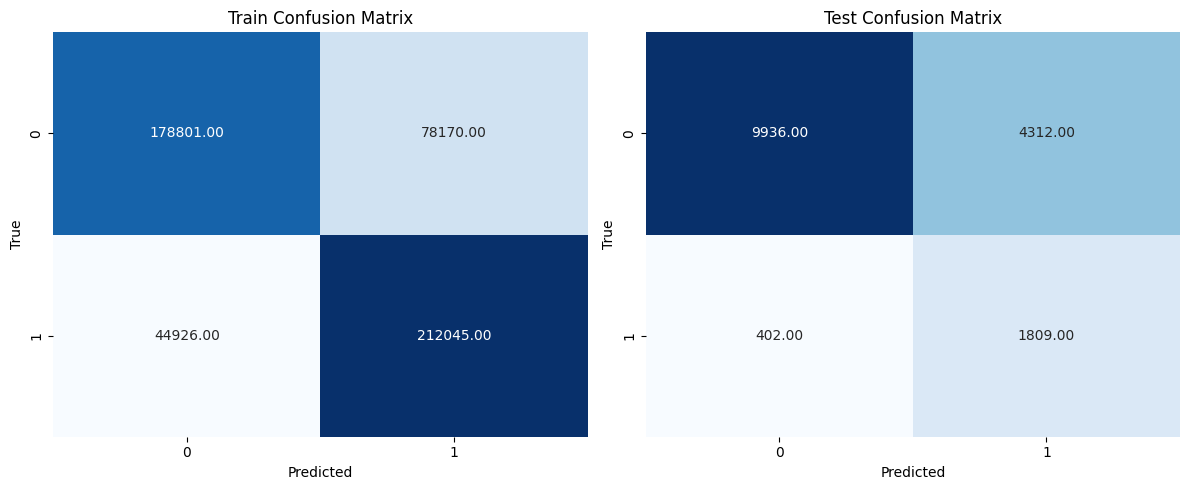

Epoch 1/3
1004/1004 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7031 - loss: 1.8752 - val_accuracy: 0.6849 - val_loss: 0.8936
Epoch 2/3
1004/1004 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7529 - loss: 0.7651 - val_accuracy: 0.6880 - val_loss: 0.7163
Epoch 3/3
1004/1004 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7563 - loss: 0.6290 - val_accuracy: 0.7217 - val_loss: 0.6170
16061/16061 ━━━━━━━━━━━━━━━━━━━━ 8s 514us/step
515/515 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step
Accuracy train: 0.7589
Accuracy test: 0.7217
F1 Score train: 0.7713
F1 Score test: 0.4383


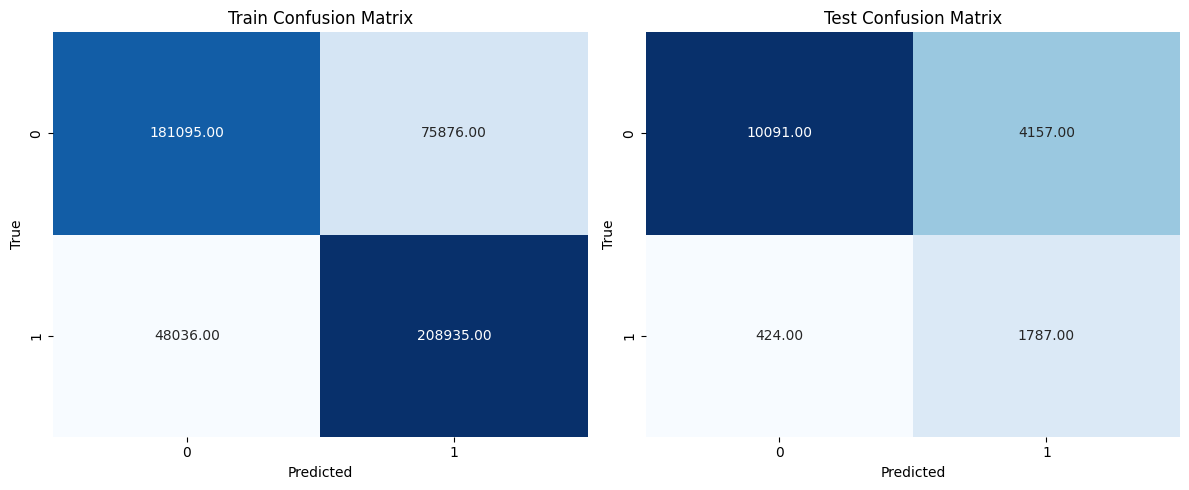

Epoch 1/3
1004/1004 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6879 - loss: 4.6600 - val_accuracy: 0.6883 - val_loss: 0.7972
Epoch 2/3
1004/1004 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7216 - loss: 0.7118 - val_accuracy: 0.7260 - val_loss: 0.6678
Epoch 3/3
1004/1004 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7159 - loss: 0.6592 - val_accuracy: 0.6714 - val_loss: 0.7153
16061/16061 ━━━━━━━━━━━━━━━━━━━━ 8s 508us/step
515/515 ━━━━━━━━━━━━━━━━━━━━ 0s 622us/step
Accuracy train: 0.7210
Accuracy test: 0.6714
F1 Score train: 0.7386
F1 Score test: 0.3940


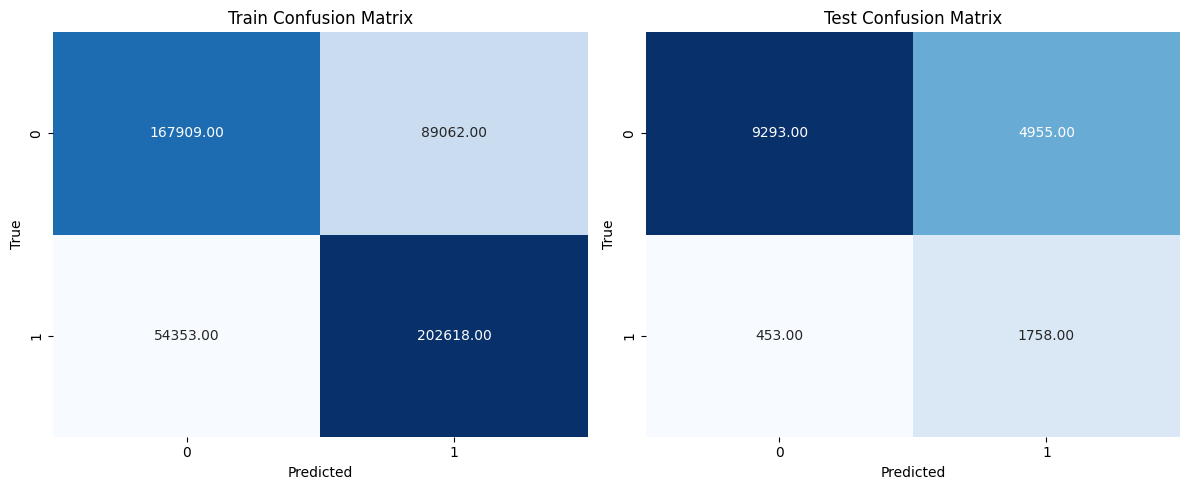

Epoch 1/3
1004/1004 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6712 - loss: 7.6993 - val_accuracy: 0.7418 - val_loss: 0.7546
Epoch 2/3
1004/1004 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6803 - loss: 0.7370 - val_accuracy: 0.7703 - val_loss: 0.7056
Epoch 3/3
1004/1004 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6688 - loss: 0.7209 - val_accuracy: 0.7528 - val_loss: 0.7186
16061/16061 ━━━━━━━━━━━━━━━━━━━━ 8s 510us/step
515/515 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step
Accuracy train: 0.6644
Accuracy test: 0.7528
F1 Score train: 0.6175
F1 Score test: 0.3653


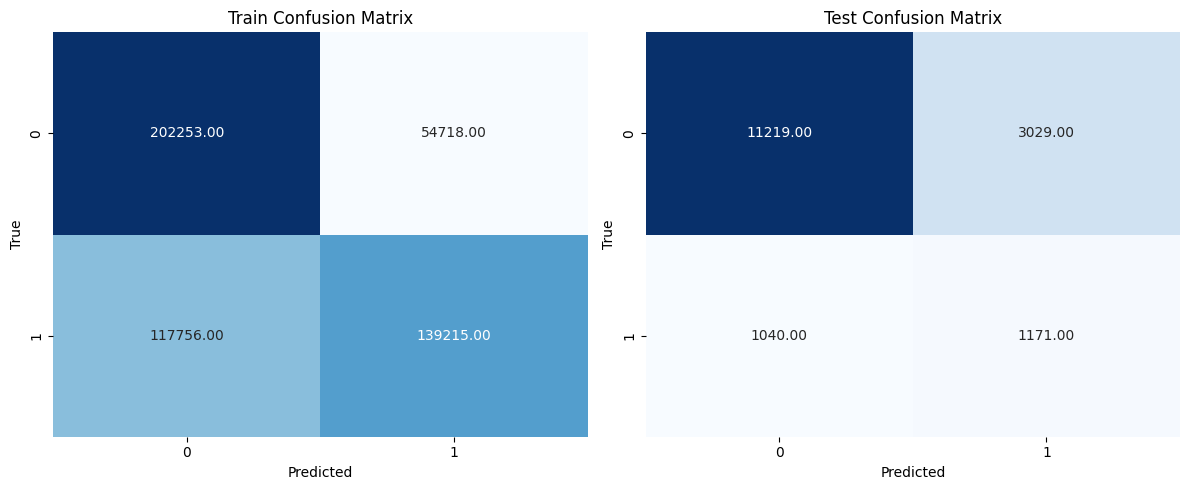

Epoch 1/3
1004/1004 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7121 - loss: 1.0550 - val_accuracy: 0.7186 - val_loss: 0.7630
Epoch 2/3
1004/1004 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7511 - loss: 0.7128 - val_accuracy: 0.7170 - val_loss: 0.6871
Epoch 3/3
1004/1004 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7551 - loss: 0.6423 - val_accuracy: 0.7085 - val_loss: 0.6498
16061/16061 ━━━━━━━━━━━━━━━━━━━━ 8s 525us/step
515/515 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step
Accuracy train: 0.7589
Accuracy test: 0.7085
F1 Score train: 0.7743
F1 Score test: 0.4299


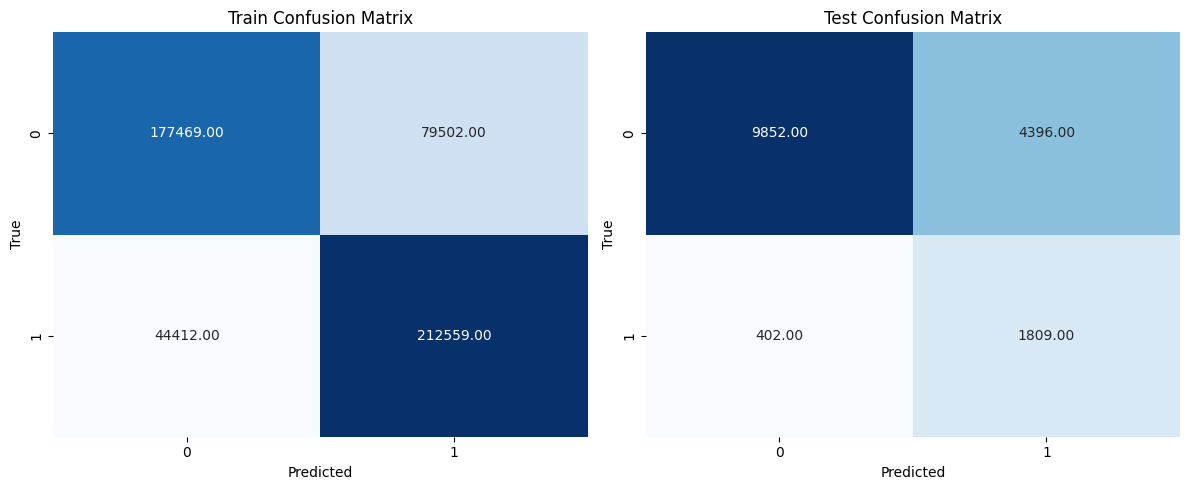

Epoch 1/3
1004/1004 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7120 - loss: 1.6529 - val_accuracy: 0.7921 - val_loss: 0.7004
Epoch 2/3
1004/1004 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7542 - loss: 0.7373 - val_accuracy: 0.7383 - val_loss: 0.6416
Epoch 3/3
1004/1004 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7569 - loss: 0.6249 - val_accuracy: 0.7747 - val_loss: 0.5346
16061/16061 ━━━━━━━━━━━━━━━━━━━━ 8s 520us/step
515/515 ━━━━━━━━━━━━━━━━━━━━ 0s 653us/step
Accuracy train: 0.7514
Accuracy test: 0.7747
F1 Score train: 0.7431
F1 Score test: 0.4575


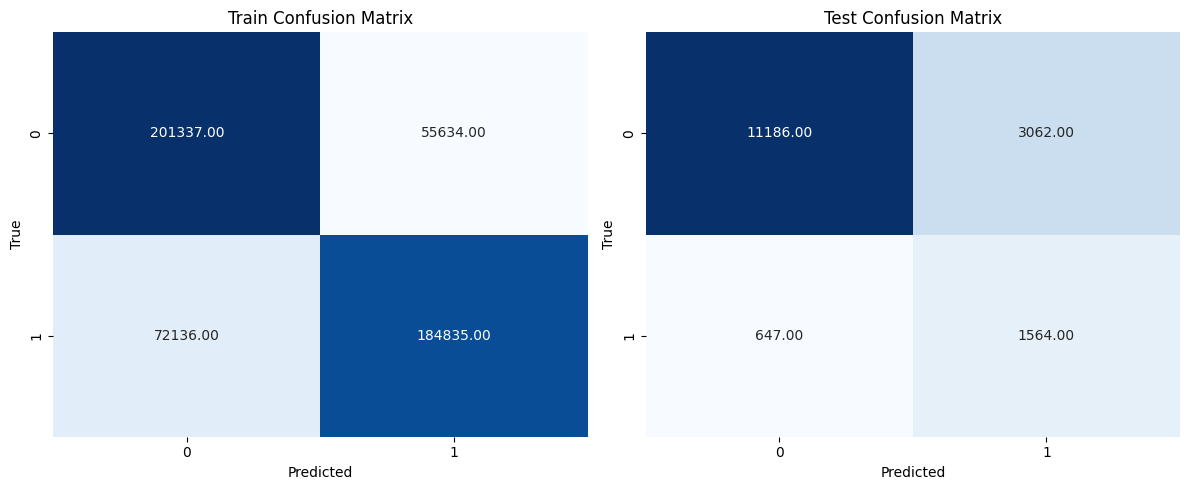

Epoch 1/3
1004/1004 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7018 - loss: 2.0185 - val_accuracy: 0.7399 - val_loss: 0.7604
Epoch 2/3
1004/1004 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7507 - loss: 0.7102 - val_accuracy: 0.7038 - val_loss: 0.6744
Epoch 3/3
1004/1004 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7540 - loss: 0.6092 - val_accuracy: 0.7499 - val_loss: 0.5716
16061/16061 ━━━━━━━━━━━━━━━━━━━━ 8s 507us/step
515/515 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step
Accuracy train: 0.7551
Accuracy test: 0.7499
F1 Score train: 0.7568
F1 Score test: 0.4480


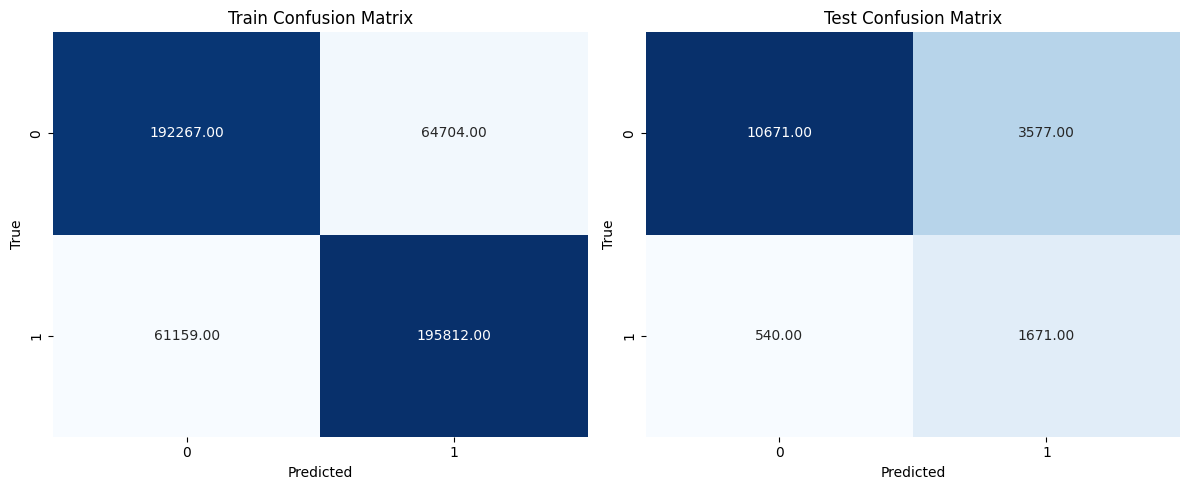

Epoch 1/3
1004/1004 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6804 - loss: 4.5130 - val_accuracy: 0.7429 - val_loss: 0.6978
Epoch 2/3
1004/1004 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7116 - loss: 0.6908 - val_accuracy: 0.7020 - val_loss: 0.7028
Epoch 3/3
1004/1004 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7133 - loss: 0.6700 - val_accuracy: 0.7031 - val_loss: 0.6954
16061/16061 ━━━━━━━━━━━━━━━━━━━━ 8s 519us/step
515/515 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step
Accuracy train: 0.7185
Accuracy test: 0.7031
F1 Score train: 0.7237
F1 Score test: 0.4023


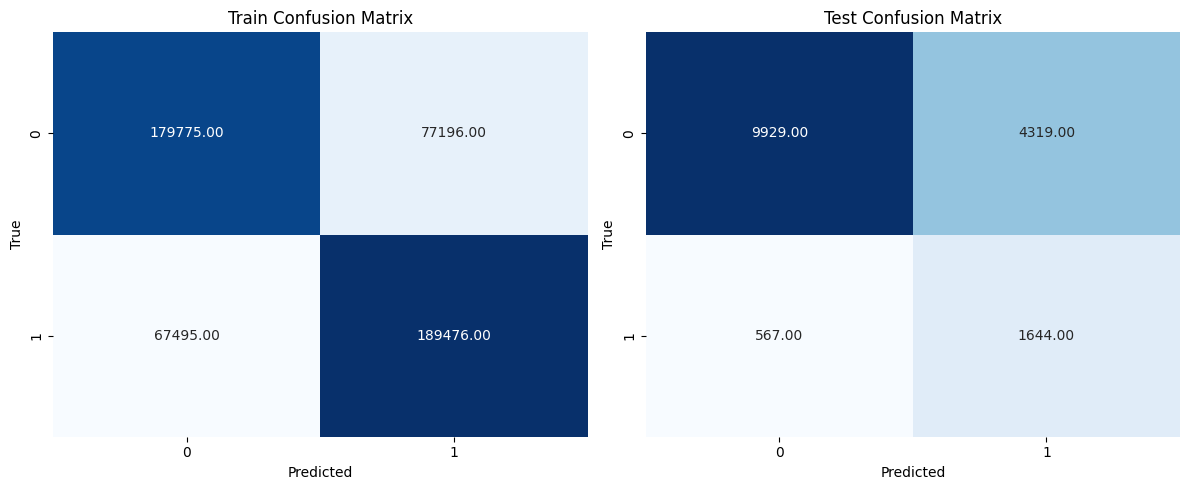

Epoch 1/3
1004/1004 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6702 - loss: 9.0921 - val_accuracy: 0.7378 - val_loss: 0.8534
Epoch 2/3
1004/1004 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6781 - loss: 0.7944 - val_accuracy: 0.7582 - val_loss: 0.7256
Epoch 3/3
1004/1004 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6622 - loss: 0.7313 - val_accuracy: 0.6846 - val_loss: 0.7324
16061/16061 ━━━━━━━━━━━━━━━━━━━━ 9s 579us/step
515/515 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step
Accuracy train: 0.6750
Accuracy test: 0.6846
F1 Score train: 0.6705
F1 Score test: 0.3572


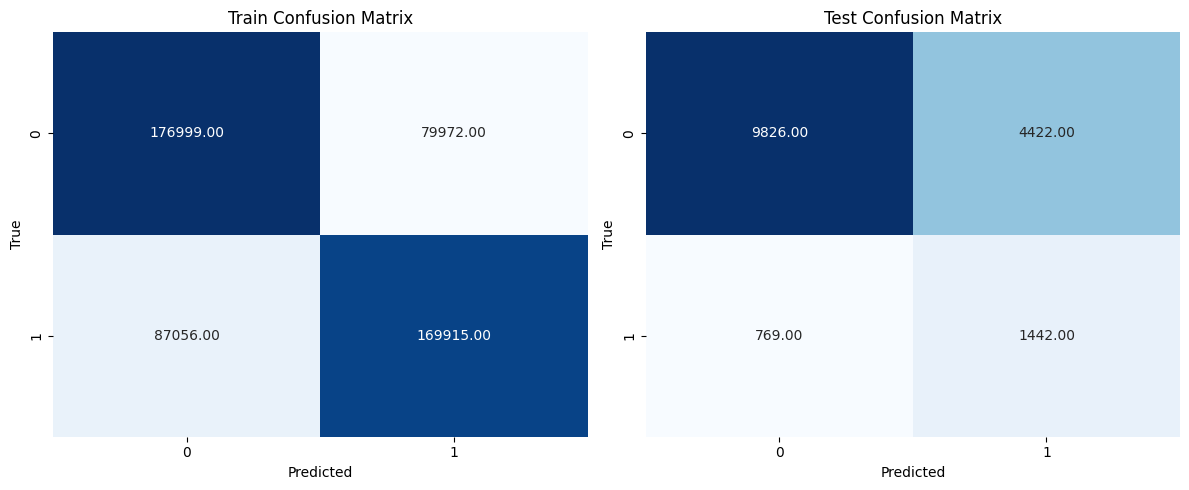

Epoch 1/3
1004/1004 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6911 - loss: 1.6490 - val_accuracy: 0.6412 - val_loss: 0.9832
Epoch 2/3
1004/1004 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7508 - loss: 0.7924 - val_accuracy: 0.7727 - val_loss: 0.6252
Epoch 3/3
1004/1004 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7561 - loss: 0.6589 - val_accuracy: 0.7011 - val_loss: 0.6628
16061/16061 ━━━━━━━━━━━━━━━━━━━━ 9s 562us/step
515/515 ━━━━━━━━━━━━━━━━━━━━ 0s 731us/step
Accuracy train: 0.7576
Accuracy test: 0.7011
F1 Score train: 0.7752
F1 Score test: 0.4266


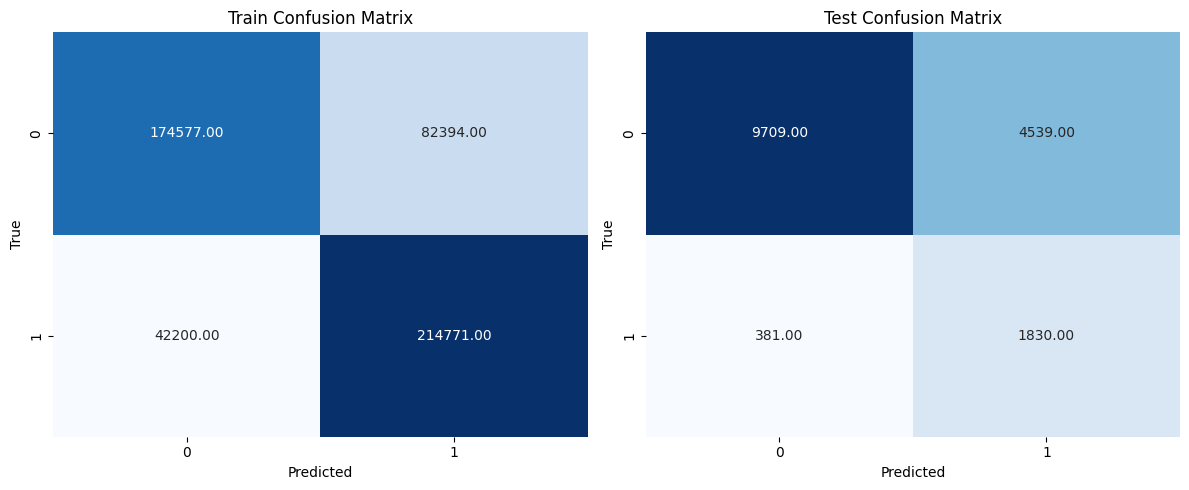

Epoch 1/3
1004/1004 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7157 - loss: 2.0083 - val_accuracy: 0.7658 - val_loss: 0.9194
Epoch 2/3
1004/1004 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7476 - loss: 0.8842 - val_accuracy: 0.7207 - val_loss: 0.7625
Epoch 3/3
1004/1004 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7532 - loss: 0.7048 - val_accuracy: 0.7325 - val_loss: 0.6624
16061/16061 ━━━━━━━━━━━━━━━━━━━━ 9s 569us/step
515/515 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step
Accuracy train: 0.7575
Accuracy test: 0.7325
F1 Score train: 0.7661
F1 Score test: 0.4426


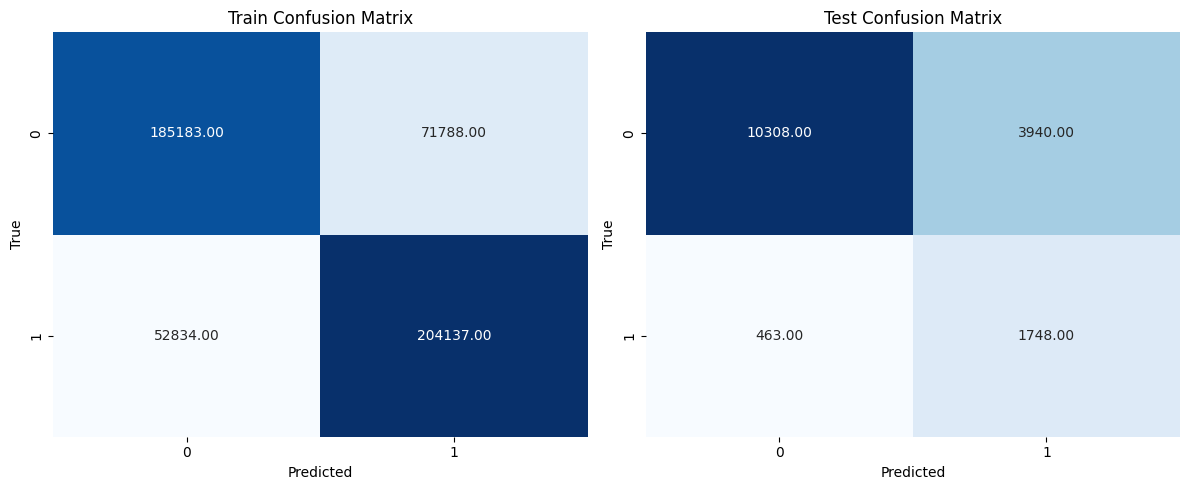

Epoch 1/3
1004/1004 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6965 - loss: 2.3012 - val_accuracy: 0.6951 - val_loss: 0.9234
Epoch 2/3
1004/1004 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7503 - loss: 0.7982 - val_accuracy: 0.7548 - val_loss: 0.6560
Epoch 3/3
1004/1004 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7528 - loss: 0.6501 - val_accuracy: 0.7349 - val_loss: 0.6242
16061/16061 ━━━━━━━━━━━━━━━━━━━━ 9s 558us/step
515/515 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step
Accuracy train: 0.7559
Accuracy test: 0.7349
F1 Score train: 0.7628
F1 Score test: 0.4437


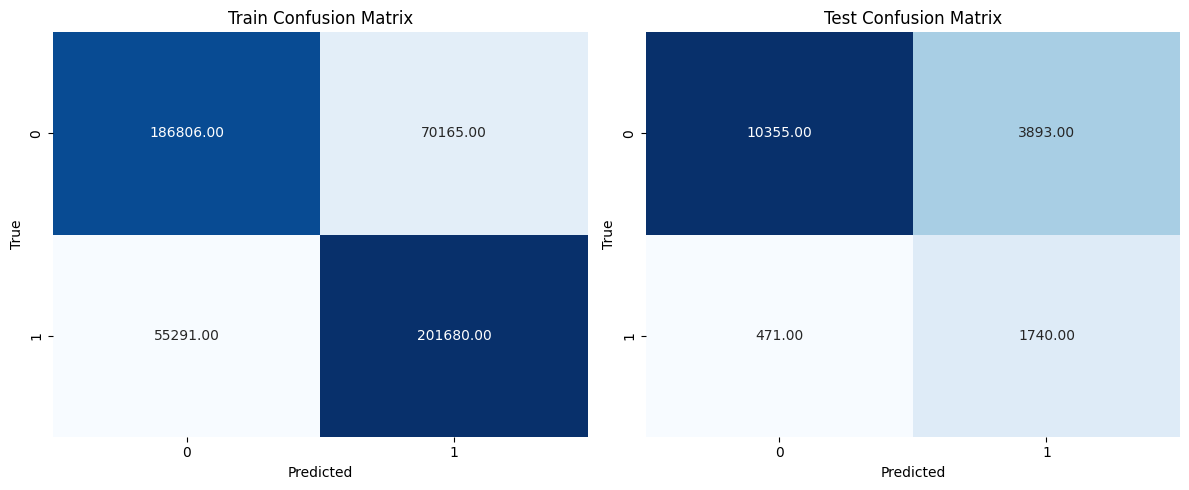

Epoch 1/3
1004/1004 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6727 - loss: 4.8847 - val_accuracy: 0.7211 - val_loss: 0.7414
Epoch 2/3
1004/1004 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7055 - loss: 0.7047 - val_accuracy: 0.6941 - val_loss: 0.7140
Epoch 3/3
1004/1004 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7125 - loss: 0.6741 - val_accuracy: 0.7503 - val_loss: 0.6540
16061/16061 ━━━━━━━━━━━━━━━━━━━━ 15s 959us/step
515/515 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Accuracy train: 0.7071
Accuracy test: 0.7503
F1 Score train: 0.6885
F1 Score test: 0.4133


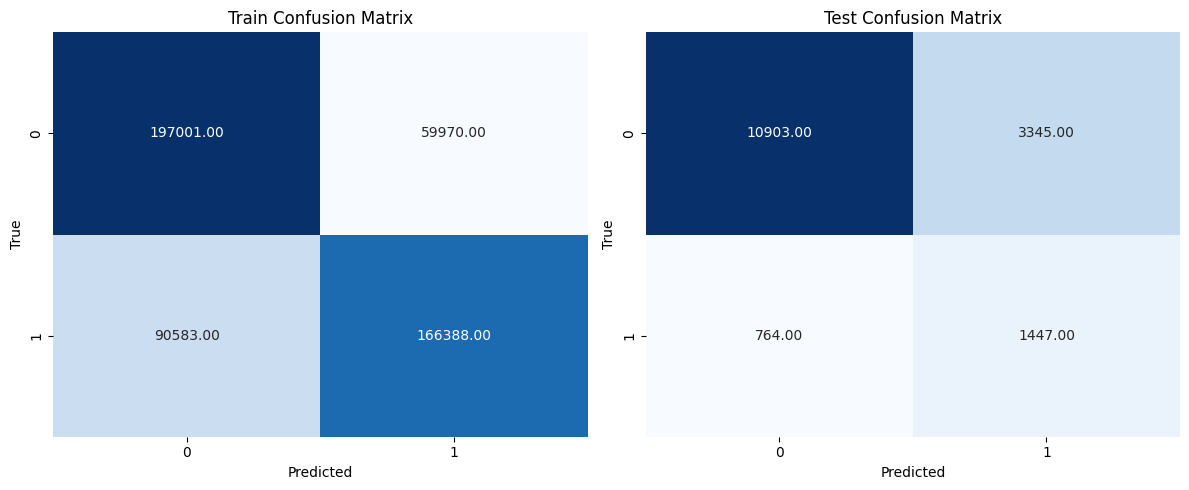

Epoch 1/3
1004/1004 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6872 - loss: 8.2025 - val_accuracy: 0.7399 - val_loss: 0.7543
Epoch 2/3
1004/1004 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6456 - loss: 0.7389 - val_accuracy: 0.1343 - val_loss: 0.7005
Epoch 3/3
1004/1004 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4980 - loss: 0.6954 - val_accuracy: 0.8657 - val_loss: 0.6935
16061/16061 ━━━━━━━━━━━━━━━━━━━━ 21s 1ms/step
515/515 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Accuracy train: 0.5000
Accuracy test: 0.8657
F1 Score train: 0.0000
F1 Score test: 0.0000


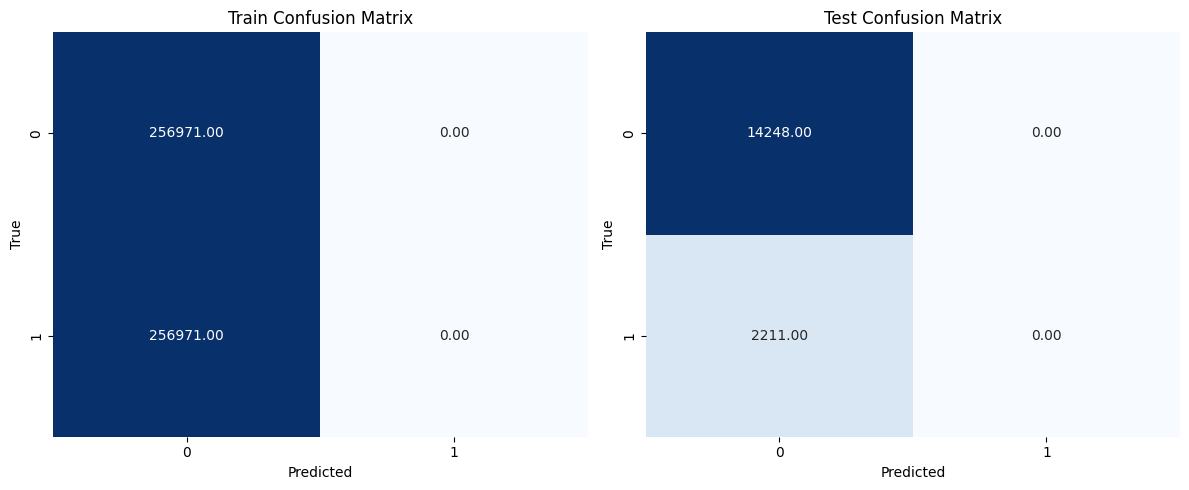

Epoch 1/3
1004/1004 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6997 - loss: 2.0787 - val_accuracy: 0.7873 - val_loss: 0.7412
Epoch 2/3
1004/1004 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7524 - loss: 0.7583 - val_accuracy: 0.7559 - val_loss: 0.6190
Epoch 3/3
1004/1004 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7558 - loss: 0.6316 - val_accuracy: 0.6931 - val_loss: 0.6535
16061/16061 ━━━━━━━━━━━━━━━━━━━━ 18s 1ms/step
515/515 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Accuracy train: 0.7561
Accuracy test: 0.6931
F1 Score train: 0.7758
F1 Score test: 0.4236


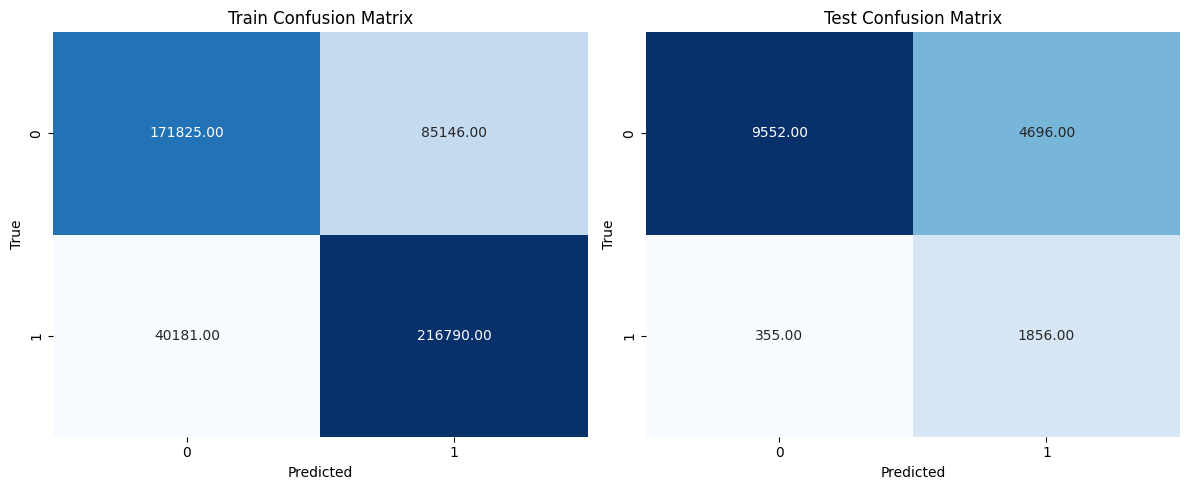

Epoch 1/3
1004/1004 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6849 - loss: 2.7159 - val_accuracy: 0.7806 - val_loss: 0.8082
Epoch 2/3
1004/1004 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7484 - loss: 0.7987 - val_accuracy: 0.7703 - val_loss: 0.6031
Epoch 3/3
1004/1004 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7545 - loss: 0.6384 - val_accuracy: 0.7634 - val_loss: 0.5596
16061/16061 ━━━━━━━━━━━━━━━━━━━━ 8s 517us/step
515/515 ━━━━━━━━━━━━━━━━━━━━ 0s 689us/step
Accuracy train: 0.7523
Accuracy test: 0.7634
F1 Score train: 0.7481
F1 Score test: 0.4515


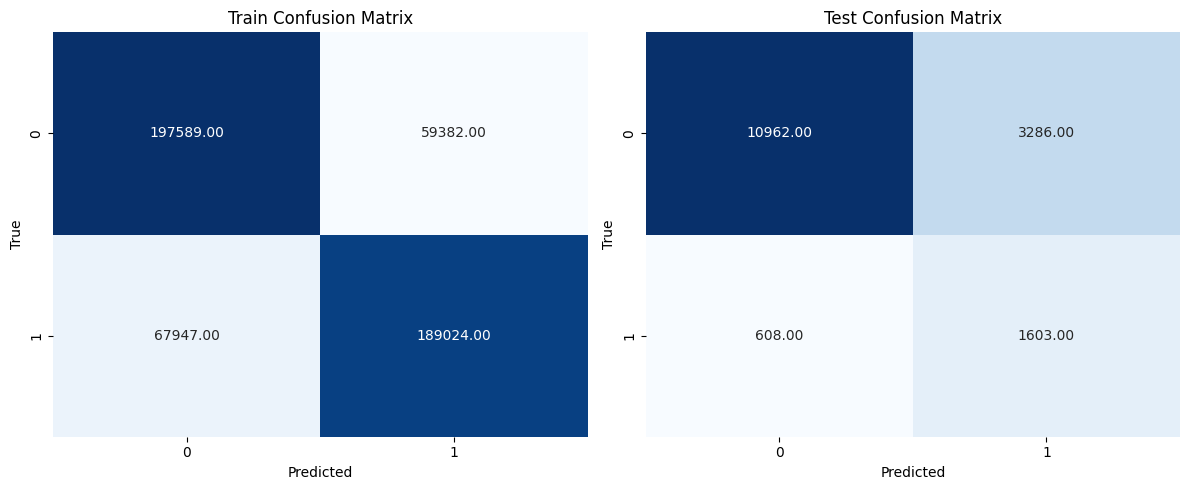

Epoch 1/3
1004/1004 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6948 - loss: 2.7535 - val_accuracy: 0.7140 - val_loss: 0.7810
Epoch 2/3
1004/1004 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7506 - loss: 0.7078 - val_accuracy: 0.7216 - val_loss: 0.6521
Epoch 3/3
1004/1004 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7548 - loss: 0.6218 - val_accuracy: 0.7286 - val_loss: 0.6183
16061/16061 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step
515/515 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy train: 0.7561
Accuracy test: 0.7286
F1 Score train: 0.7656
F1 Score test: 0.4396


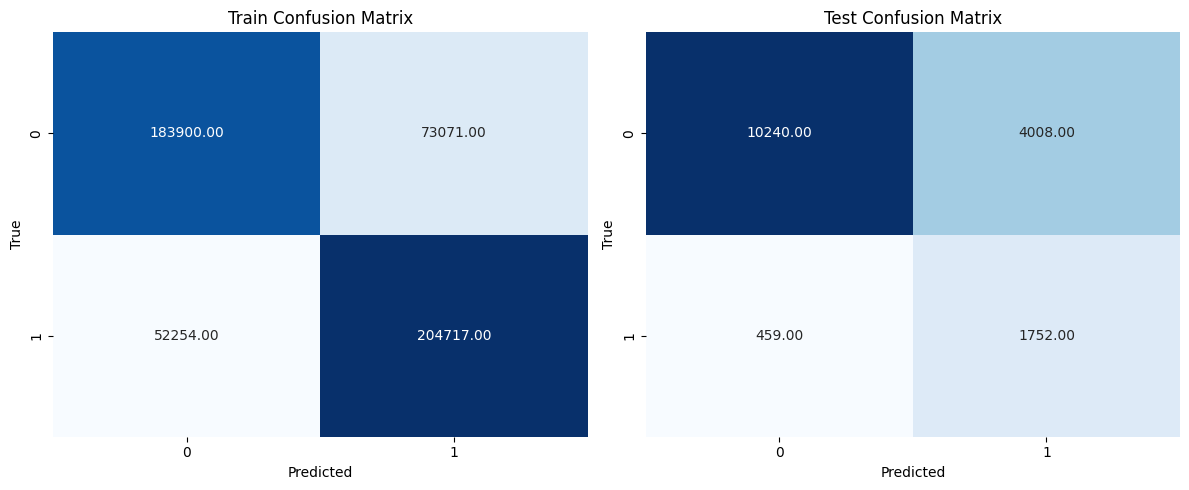

Epoch 1/3
1004/1004 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6758 - loss: 5.1547 - val_accuracy: 0.7449 - val_loss: 0.7035
Epoch 2/3
1004/1004 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6967 - loss: 0.6949 - val_accuracy: 0.7125 - val_loss: 0.7028
Epoch 3/3
1004/1004 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7103 - loss: 0.6814 - val_accuracy: 0.7556 - val_loss: 0.6595
16061/16061 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step
515/515 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Accuracy train: 0.7019
Accuracy test: 0.7556
F1 Score train: 0.6779
F1 Score test: 0.4083


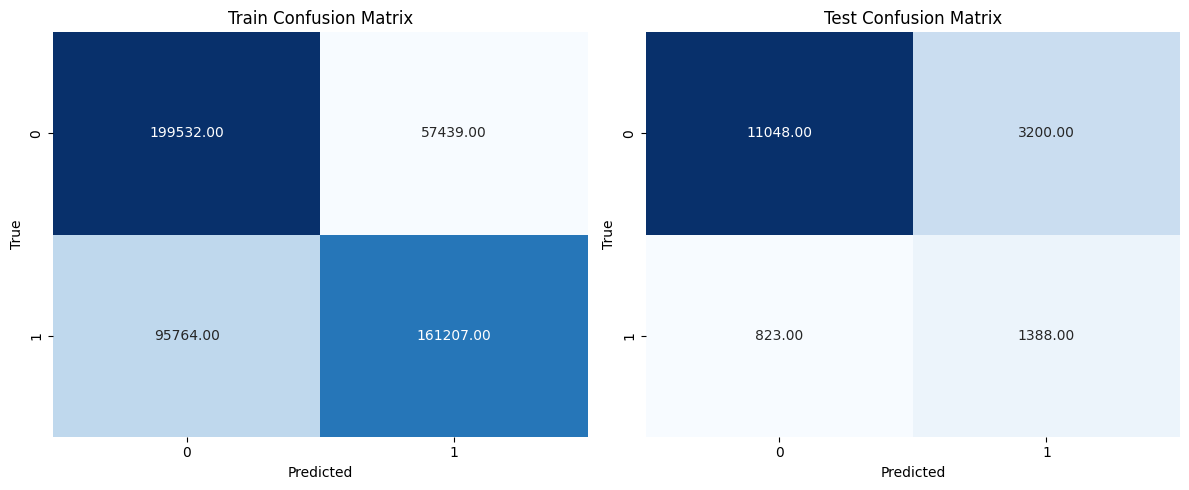

Epoch 1/3
1004/1004 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6589 - loss: 8.9712 - val_accuracy: 0.7522 - val_loss: 0.7621
Epoch 2/3
1004/1004 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6399 - loss: 0.7479 - val_accuracy: 0.8657 - val_loss: 0.7000
Epoch 3/3
1004/1004 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4986 - loss: 0.6976 - val_accuracy: 0.1343 - val_loss: 0.7007
16061/16061 ━━━━━━━━━━━━━━━━━━━━ 24s 1ms/step
515/515 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy train: 0.5000
Accuracy test: 0.1343
F1 Score train: 0.6667
F1 Score test: 0.2369


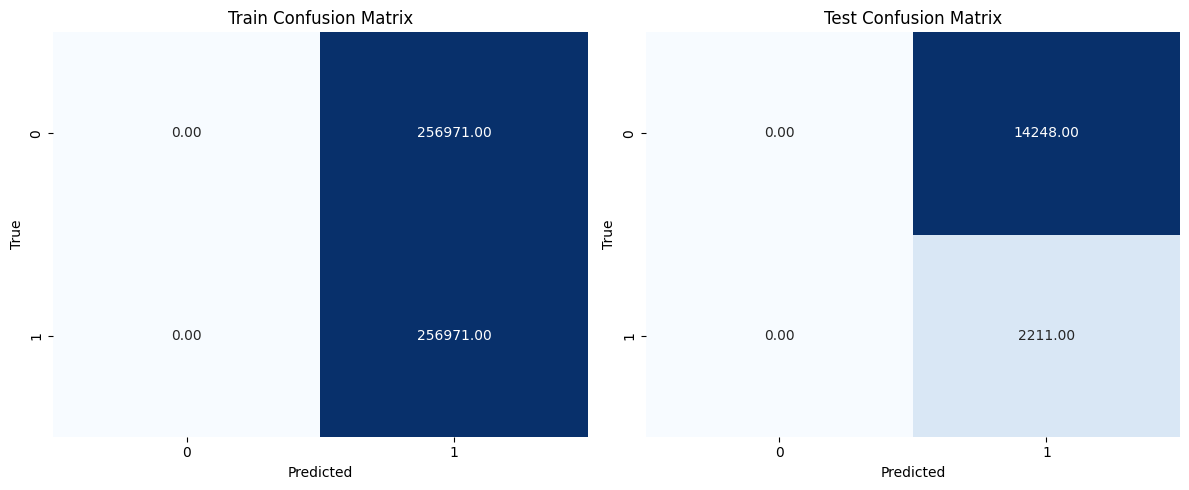

In [40]:
year = '2011'
X_train,Y_train = preprocessed.get_data(year,'Smote',data = 'train')
X_test,Y_test = preprocessed.get_data(year,'Smote',data = 'test')
num_input = X_train.shape[1]
model_list = model.create_list_model(num_input,hidden_layers_list,dropout_rate_list,l1_rate_list,l2_rate_list)
model_min = None
min_F1 = 0.0

for model_year in model_list:
    train.train_model(X_train,Y_train,X_test,Y_test,model_year,hyperparameters)
    final_eval = evaluate.evaluate_model(model_year,X_train,Y_train,X_test,Y_test)
    f1_model = final_eval['f1_score_test']
    if f1_model > min_F1 :
        min_F1 = f1_model
        model_min = model_year
        


In [43]:
for layer in model_min.layers:
    print(f"Layer: {layer.name}")
    print(f"Kernel Regularizer: {layer.get_config().get('kernel_regularizer')}")
    print(f"Bias Regularizer: {layer.get_config().get('bias_regularizer')}")
    print(f"Activity Regularizer: {layer.get_config().get('activity_regularizer')}")
    print("-" * 40)

Layer: dense_5653
Kernel Regularizer: {'module': 'keras.regularizers', 'class_name': 'L1L2', 'config': {'l1': 0.001, 'l2': 0.005}, 'registered_name': None}
Bias Regularizer: None
Activity Regularizer: None
----------------------------------------
Layer: dropout_4296
Kernel Regularizer: None
Bias Regularizer: None
Activity Regularizer: None
----------------------------------------
Layer: dense_5654
Kernel Regularizer: {'module': 'keras.regularizers', 'class_name': 'L1L2', 'config': {'l1': 0.001, 'l2': 0.005}, 'registered_name': None}
Bias Regularizer: None
Activity Regularizer: None
----------------------------------------
Layer: dropout_4297
Kernel Regularizer: None
Bias Regularizer: None
Activity Regularizer: None
----------------------------------------
Layer: dense_5655
Kernel Regularizer: {'module': 'keras.regularizers', 'class_name': 'L1L2', 'config': {'l1': 0.001, 'l2': 0.005}, 'registered_name': None}
Bias Regularizer: None
Activity Regularizer: None
----------------------------

### KAN 

In [5]:
features_relevance = ['Sex','Healthcare_coverage','Blood_pressure','CHOLCHK','PHYSHLTH','MEDCOST','GENHLTH','Income_bracket','MENTHLTH','Exercise_last_mo','BMI','Had_stroke']

In [20]:
year = '2011'

X_train,Y_train = preprocessed.get_data(year,'NearMiss',data = 'train')
X_test,Y_test = preprocessed.get_data(year,'NearMiss',data = 'test')
X_train = X_train[features_relevance]
X_test = X_test[features_relevance]

num_input = X_train.shape[1]
features_name = list(X_train.columns)



model_kan = model.create_kan_model(num_input,[3,2],grid = 5,degree=4)

checkpoint directory created: ./model
saving model version 0.0


In [ ]:

loss = nn.BCEWithLogitsLoss(pos_weight=torch.tensor([1.0]))
hyperparameters = {'steps' : 2,
                   'l1_rate' : 1,
                   'optimizer' : 'LBFGS',
                   'lentropy_rate' : 0.0,
                   'loss_function' : loss}


In [23]:
result = train.train_kan(X_train,Y_train,X_test,Y_test,model_kan,hyperparameters)

| train_loss: 6.22e-01 | test_loss: 1.12e+00 | reg: 1.49e+01 | : 100%|█| 2/2 [02:38<00:00, 79.43s/it


Accuracy train: 0.7296
Accuracy test: 0.5095
F1 Score train: 0.7147
F1 Score test: 0.2719


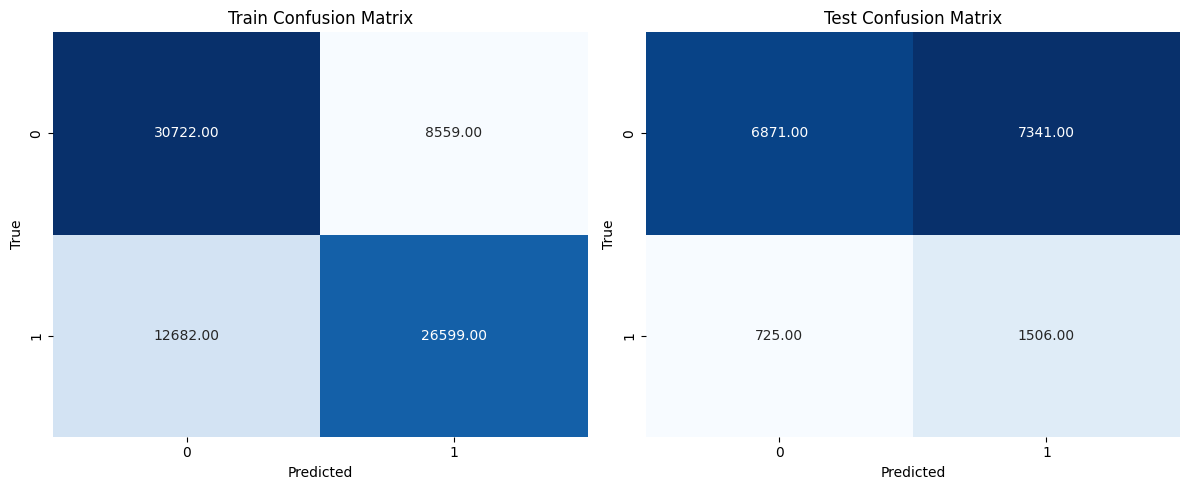

{'accuracy_train': 0.7296275553066368,
 'accuracy_test': 0.5094569117557624,
 'f1_score_train': 0.7146522656134553,
 'f1_score_test': 0.2718902328940242,
 'confusion_matrix_train': array([[30722,  8559],
        [12682, 26599]], dtype=int64),
 'confusion_matrix_test': array([[6871, 7341],
        [ 725, 1506]], dtype=int64)}

In [17]:
evaluate.evaluate_model_kan(X_train,Y_train,X_test,Y_test,model_kan)